In [3]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import staintools

Populating the interactive namespace from numpy and matplotlib


In [4]:
imglist = []
target = staintools.read_image("normalization/target.jpg")
img1 = staintools.read_image("normalization/1.jpg")
img2 = staintools.read_image("normalization/2.jpg")
img3 = staintools.read_image("normalization/3.jpg")
img4 = staintools.read_image("normalization/4.jpg")
img5 = staintools.read_image("normalization/5.jpg")
imglist.extend([target,img1,img2,img3,img4,img5])

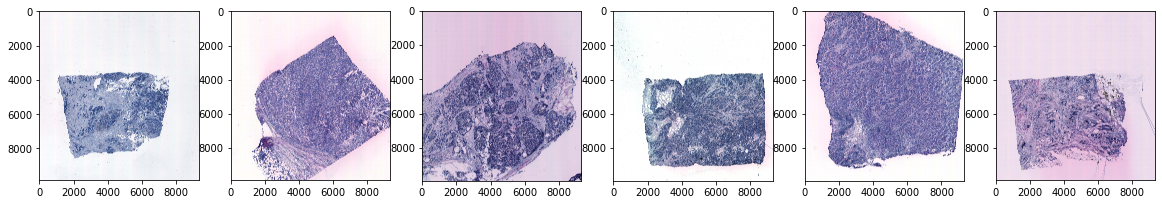

In [5]:
# Read data
fig=plt.figure(figsize=(20, 20))
for i in range(1,7):  
    fig.add_subplot(1, 6, i)
    plt.imshow(imglist[i-1])
plt.show()

In [6]:
normalizer = staintools.StainNormalizer(method='vahadane')
normalizer.fit(target)
new_list = [target]
for i in range(1,6):
    transformed = normalizer.transform(imglist[i])
    new_list.append(transformed)

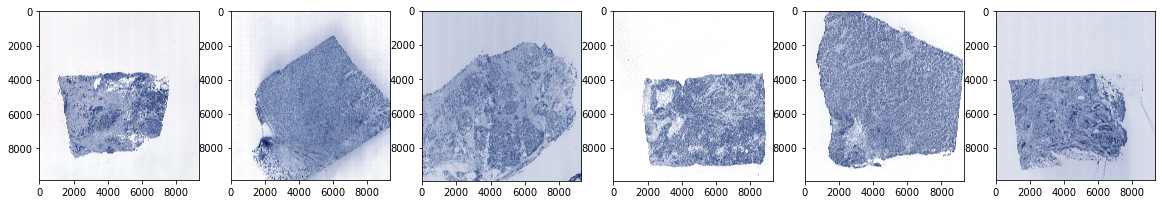

In [7]:
# Read data
fig=plt.figure(figsize=(20, 20))
for i in range(1,7):  
    fig.add_subplot(1, 6, i)
    plt.imshow(new_list[i-1])
plt.show()

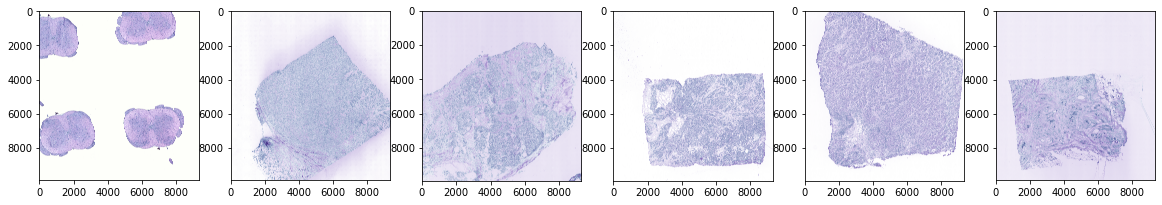

In [2]:
imglist = []
target = staintools.read_image("normalization/target1.jpg")
img1 = staintools.read_image("normalization/1.jpg")
img2 = staintools.read_image("normalization/2.jpg")
img3 = staintools.read_image("normalization/3.jpg")
img4 = staintools.read_image("normalization/4.jpg")
img5 = staintools.read_image("normalization/5.jpg")
imglist.extend([target,img1,img2,img3,img4,img5])
normalizer = staintools.StainNormalizer(method='vahadane')
normalizer.fit(target)
new_list = [target]
for i in range(1,6):
    transformed = normalizer.transform(imglist[i])
    new_list.append(transformed)
# Read data
fig=plt.figure(figsize=(20, 20))
for i in range(1,7):  
    fig.add_subplot(1, 6, i)
    plt.imshow(new_list[i-1])
plt.show()

/home/chenxingjian/miniconda3/envs/pytorch/lib/python3.8/site-packages/PIL/Image.py:2855: DecompressionBombWarning: Image size (92322594 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


TypeError: Image data of dtype <U8 cannot be converted to float

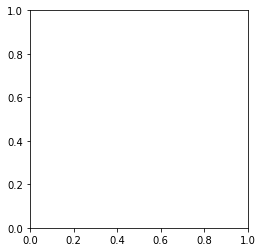

In [10]:
# img1 = staintools.read_image("normalization/1.jpg")

import skimage.io
img1 = skimage.io.imread("normalization/1.jpg")
target = staintools.read_image("normalization/target.jpg")
normalizer = staintools.StainNormalizer(method='vahadane')
normalizer.fit(target)
transformed = normalizer.transform(img1)
skimage.io.imsave('img2.jpg', transformed)


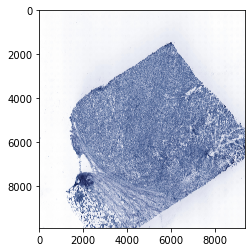

In [12]:
img2 = skimage.io.imread("img2.jpg")
plt.imshow(img2)

In [ ]:
# Read data
# target = staintools.read_image("./data/my_target_image.png")
# to_transform = staintools.read_image("./data/my_image_to_transform.png")

# Standardize brightness (This step is optional but can improve the tissue mask calculation)
# target = staintools.LuminosityStandardizer.standardize(target)
# to_transform = staintools.LuminosityStandardizer.standardize(to_transform)

# Stain normalize
normalizer = staintools.StainNormalizer(method='vahadane')
normalizer.fit(target)
transformed = normalizer.transform(to_transform)

In [ ]:

# Standardize brightness (This step is optional but can improve the tissue mask calculation)
target = staintools.LuminosityStandardizer.standardize(target)
to_transform = staintools.LuminosityStandardizer.standardize(to_transform)

# Stain normalize
normalizer = staintools.StainNormalizer(method='vahadane')
normalizer.fit(target)
transformed = normalizer.transform(to_transform)

In [127]:
import torch
import torchvision
import numpy as np
import logging
import pathlib
import traceback
import random
import time
import os
import glob
import socket
import argparse
import collections
import utils
from efficientnet_pytorch import EfficientNet

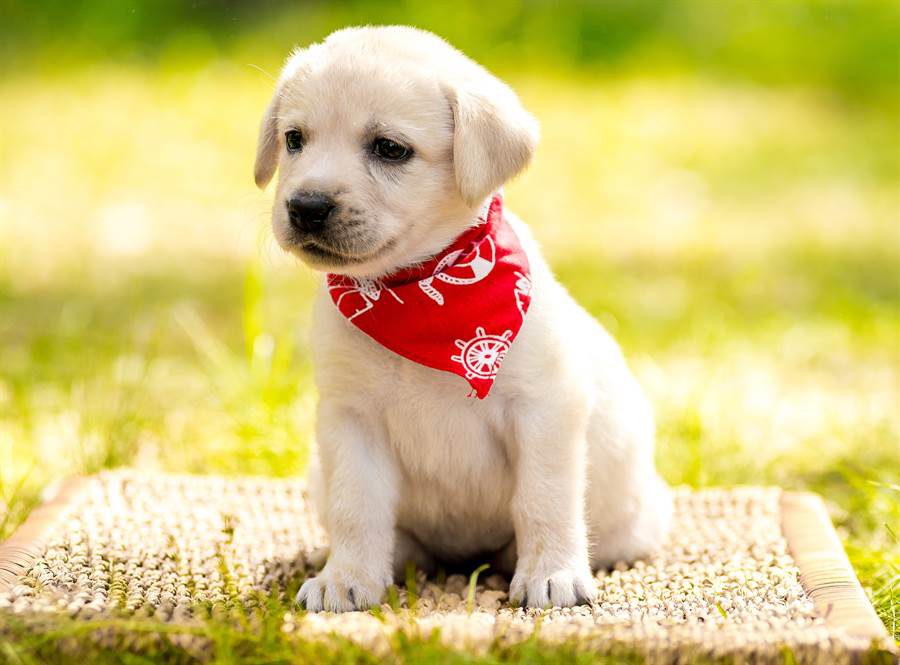

In [2]:
import PIL.Image as Image
import torchvision
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")
imagepath='dog.png'

    
# read image with PIL module
img_pil = Image.open(imagepath, mode='r')
img_pil = img_pil.convert('RGB')
img_pil

In [4]:
from torchvision import transforms
from torchvision.transforms import functional as TF

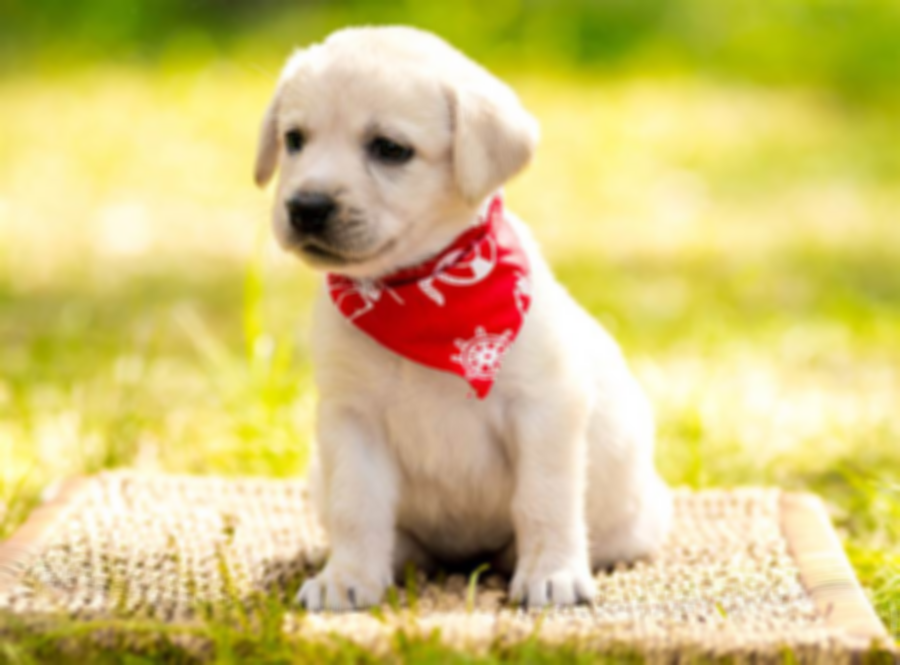

In [5]:
transform = transforms.Compose([
    transforms.GaussianBlur(7,3)
])
new_img = transform(img_pil)
new_img


In [161]:
import torchvision.transforms.functional as TF
import random

class MyRotationTransform:
    """Rotate by one of the given angles."""

    def __init__(self, angles):
        self.angles = angles

    def __call__(self, x):
        angle = random.choice(self.angles)
        return TF.rotate(x, angle)

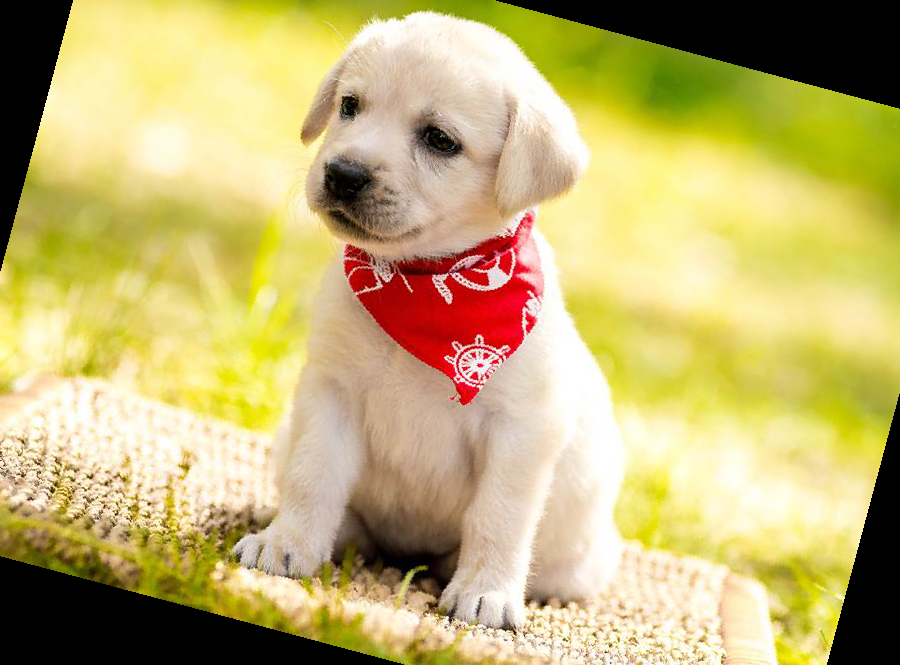

In [131]:
rotation_transform(img_pil)

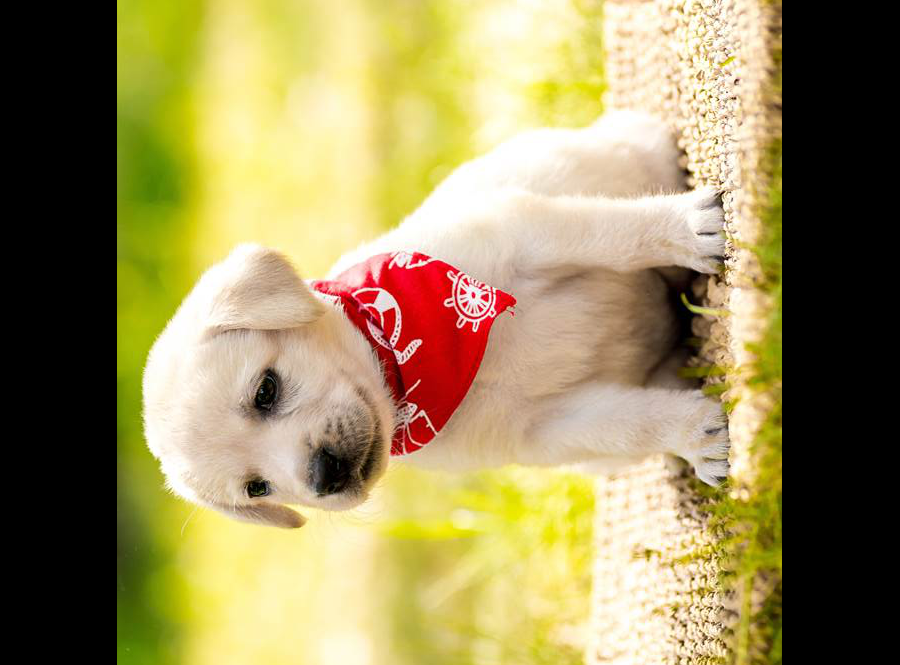

In [289]:
transform = []
a = random.choice([-90, -180, -270, 90, 180, 270])
transform.extend( [ torchvision.transforms.RandomApply( ([random.choice([torchvision.transforms.RandomRotation((-90,-90)),
                                                          torchvision.transforms.RandomRotation((90,90)),
                                                          torchvision.transforms.RandomRotation((-180,-180)),
                                                          torchvision.transforms.RandomRotation((180,180)),])
                                                          
                                                          
                                                        
                                                        
                                                        
                                                        
                                                        
                                                        ]) ) ] )         
                          
transform = torchvision.transforms.Compose(transform)
new_img = transform(img_pil)
new_img 

In [133]:
class AuxNet(torch.nn.Module):
    def __init__(self, input_features, main_:
        super(AuxNet, self).__init__()
        
        self.fc1 = torch.nn.Sequential( torch.nn.Linear(input_features, 512))
        self.fc2 = torch.nn.Sequential( torch.nn.Linear(input_features, 128))

    def forward(self, x):
        
        y1 = self.fc1(x)
        y2 = self.fc2(x)
        
        return y1,y2

In [134]:
effi_model = EfficientNet.from_pretrained('efficientnet-b7')
feature = effi_model._fc.in_features

Loaded pretrained weights for efficientnet-b7


In [135]:
effi_model._fc = AuxNet(feature)

In [136]:
effi_model

EfficientNet(
  (_conv_stem): Conv2dStaticSamePadding(
    3, 64, kernel_size=(3, 3), stride=(2, 2), bias=False
    (static_padding): ZeroPad2d(padding=(0, 1, 0, 1), value=0.0)
  )
  (_bn0): BatchNorm2d(64, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
  (_blocks): ModuleList(
    (0): MBConvBlock(
      (_depthwise_conv): Conv2dStaticSamePadding(
        64, 64, kernel_size=(3, 3), stride=[1, 1], groups=64, bias=False
        (static_padding): ZeroPad2d(padding=(1, 1, 1, 1), value=0.0)
      )
      (_bn1): BatchNorm2d(64, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
      (_se_reduce): Conv2dStaticSamePadding(
        64, 16, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_se_expand): Conv2dStaticSamePadding(
        16, 64, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_project_conv): Conv2dStaticSamePadding(
        64, 32, kernel_siz

In [137]:
X = torch.rand(8, 3,224,224)
effi_model(X)

(tensor([[ 2.6538e-01,  7.7594e-02,  3.9631e-02,  ...,  1.3364e-01,
           4.8644e-02, -7.3693e-02],
         [-2.5725e-04,  5.7194e-02, -1.9198e-01,  ...,  1.2864e-01,
          -2.5781e-01, -3.7573e-02],
         [-2.9706e-02, -3.2661e-02, -1.2870e-01,  ..., -6.0523e-03,
          -8.1026e-02,  8.0406e-02],
         ...,
         [ 2.3750e-01,  5.9870e-02,  1.1495e-01,  ...,  7.0146e-02,
          -1.2703e-01, -1.9478e-01],
         [-1.7825e-02,  1.4126e-01,  6.4831e-02,  ..., -3.7129e-02,
           1.1222e-01, -1.7264e-01],
         [-2.0404e-01,  4.7832e-02, -1.7758e-01,  ..., -1.6132e-01,
          -2.9342e-01,  2.5219e-01]], grad_fn=<AddmmBackward>),
 tensor([[-0.0858, -0.0330,  0.2398,  ...,  0.0602, -0.0235,  0.1322],
         [-0.0725,  0.1225,  0.2061,  ...,  0.0513,  0.1843, -0.1471],
         [-0.3652,  0.1375,  0.2001,  ...,  0.0933,  0.0375,  0.1696],
         ...,
         [ 0.1996, -0.0749, -0.1693,  ...,  0.1956,  0.1296, -0.0299],
         [ 0.0347,  0.0902,  0.

In [ ]:
class AuxNet(torch.nn.Module):
    def __init__(self, original_model, num_classes, num_classes_aux):
        super(AuxNet, self).__init__()
        
        input_features = original_model._fc.in_features
        
#         original_model._fc= torch.nn.Identity()
        
        self.network = torch.nn.Sequential(*list(original_model.children())[:-2])
     
        self.fc1 = torch.nn.Sequential( torch.nn.Linear(input_features, num_classes))

        self.fc2 = torch.nn.Sequential( torch.nn.Linear(input_features, num_classes_aux))

    def forward(self, x):
        
        f = self.network(x)
        
        
#         y1 = self.fc1(f)
#         y2 = self.fc2(f)
        
        return f

In [67]:
effi_model = EfficientNet.from_name("efficientnet-b7", include_top=False)
print(effi_model)

EfficientNet(
  (_conv_stem): Conv2dStaticSamePadding(
    3, 64, kernel_size=(3, 3), stride=(2, 2), bias=False
    (static_padding): ZeroPad2d(padding=(0, 1, 0, 1), value=0.0)
  )
  (_bn0): BatchNorm2d(64, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
  (_blocks): ModuleList(
    (0): MBConvBlock(
      (_depthwise_conv): Conv2dStaticSamePadding(
        64, 64, kernel_size=(3, 3), stride=[1, 1], groups=64, bias=False
        (static_padding): ZeroPad2d(padding=(1, 1, 1, 1), value=0.0)
      )
      (_bn1): BatchNorm2d(64, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
      (_se_reduce): Conv2dStaticSamePadding(
        64, 16, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_se_expand): Conv2dStaticSamePadding(
        16, 64, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_project_conv): Conv2dStaticSamePadding(
        64, 32, kernel_siz

In [35]:
print(effi_model.__dict__)

{'training': True, '_parameters': OrderedDict(), '_buffers': OrderedDict(), '_non_persistent_buffers_set': set(), '_backward_hooks': OrderedDict(), '_is_full_backward_hook': None, '_forward_hooks': OrderedDict(), '_forward_pre_hooks': OrderedDict(), '_state_dict_hooks': OrderedDict(), '_load_state_dict_pre_hooks': OrderedDict(), '_modules': OrderedDict([('_conv_stem', Conv2dStaticSamePadding(
  3, 64, kernel_size=(3, 3), stride=(2, 2), bias=False
  (static_padding): ZeroPad2d(padding=(0, 1, 0, 1), value=0.0)
)), ('_bn0', BatchNorm2d(64, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)), ('_blocks', ModuleList(
  (0): MBConvBlock(
    (_depthwise_conv): Conv2dStaticSamePadding(
      64, 64, kernel_size=(3, 3), stride=[1, 1], groups=64, bias=False
      (static_padding): ZeroPad2d(padding=(1, 1, 1, 1), value=0.0)
    )
    (_bn1): BatchNorm2d(64, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
    (_se_reduce): Conv2dStati